In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
df_put=pd.read_csv("FINAL PUT DATA.csv")
df_put

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS
0,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.77790,0.000762
1,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.67034,0.000797
2,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.58576,0.000820
3,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.56515,0.000833
4,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.54460,0.000845
...,...,...,...,...,...,...,...,...,...,...,...
241798,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701
241799,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230
241800,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575
241801,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552


In [3]:
n = len(df_put)
n_train =  (int)(0.7 * n)
print(n_train)

169262


In [4]:
train = df_put[0:n_train]
X_train = train[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [P_IV]', ' [P_DELTA]', 
                 ' [P_GAMMA]', ' [P_VEGA]', ' [P_THETA]', ' [P_RHO]']].values
y_train = train[' [P_LAST]'].values

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
X_train_scaled=scaler.fit_transform(X_train)

In [8]:
y_train=y_train.reshape(-1,1)
y_train_scaled=scaler.fit_transform(y_train)

In [9]:
y_train_scaled2=np.ravel(y_train_scaled)

In [10]:
y_train_scaled2.shape

(169262,)

In [11]:
from sklearn import svm
reg_SVM_put_greeks = svm.SVR()
reg_SVM_put_greeks.fit(X_train_scaled, y_train_scaled2)

SVR()

In [12]:
y_pred=reg_SVM_put_greeks.predict(X_train_scaled)

In [13]:
y_pred=scaler.inverse_transform(y_pred)
y_pred

array([0.16101087, 0.31199658, 0.50430482, ..., 2.8824831 , 3.64312051,
       5.90879773])

In [14]:
train['Put_SVM']=y_pred

<ipython-input-14-72b70746813f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Put_SVM']=y_pred


In [15]:
y_true=train[' [P_LAST]']
y_pred=train['Put_SVM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.8502797155996997
MSE =  22.82962106276386
RMSE =  4.778035272239403


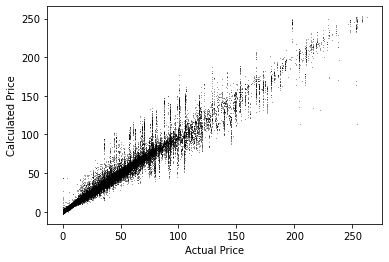

In [16]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

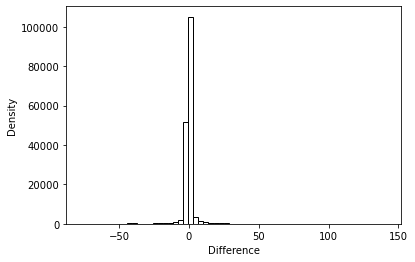

In [17]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [18]:
test = df_put[n_train+1:n]
X_test = test[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [P_IV]', ' [P_DELTA]', 
                 ' [P_GAMMA]', ' [P_VEGA]', ' [P_THETA]', ' [P_RHO]']].values
y_test = test[' [P_LAST]'].values

In [19]:
X_test_scaled=scaler.fit_transform(X_test)
y_test=y_test.reshape(-1,1)
y_test_scaled=scaler.fit_transform(y_test)
y_test_scaled2=np.ravel(y_test_scaled)

In [20]:
y_pred_test=reg_SVM_put_greeks.predict(X_test_scaled)

In [21]:
y_pred_test=scaler.inverse_transform(y_pred_test)

In [22]:
test['Put_SVM']=y_pred_test
test

<ipython-input-22-775b7ef90b76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Put_SVM']=y_pred_test


,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_SVM
169263,194.19,1.597370,155.0,9.31,-0.21728,0.00458,0.71246,-0.01784,-0.82469,0.25979,6.751424,3.986275
169264,194.19,1.597370,160.0,10.60,-0.24403,0.00499,0.75959,-0.01922,-0.93018,0.25462,7.759016,4.984088
169265,194.19,1.597370,165.0,11.85,-0.27321,0.00539,0.80422,-0.01951,-1.04431,0.24932,8.862789,5.890584
169266,194.19,1.597370,170.0,14.00,-0.30350,0.00573,0.84444,-0.02100,-1.16709,0.24518,10.166727,7.244791
169267,194.19,1.597370,175.0,15.53,-0.33531,0.00607,0.87844,-0.02109,-1.29530,0.23976,11.495512,8.437961
...,...,...,...,...,...,...,...,...,...,...,...,...
241798,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701,60.204060
241799,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230,65.783186
241800,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575,71.478371
241801,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552,77.455562


In [23]:
y_true=test[' [P_LAST]']
y_pred=test['Put_SVM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  5.217559067777436
MSE =  76.1568442294055
RMSE =  8.726788884200506


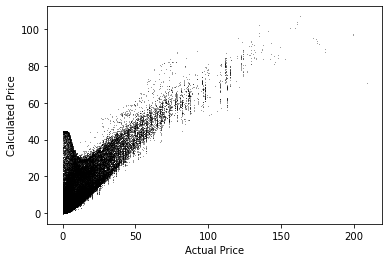

In [24]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

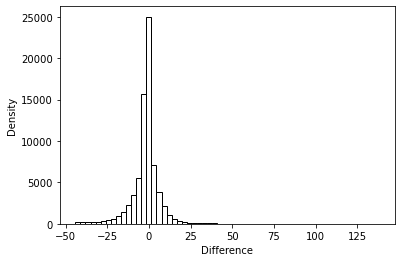

In [25]:
tats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [30]:
# train.to_csv('SVM GREEKS train PUT FINAL Results.csv', mode='a', index=False, header=True)
# test.to_csv('SVM GREEKS test PUT FINAL Results.csv', mode='a', index=False, header=True)


In [31]:
# import pickle
# filename = 'Put_SVM_greeks.sav'
# pickle.dump(reg_SVM_put_greeks, open(filename, 'wb'))


In [28]:
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

In [29]:
# from sklearn.model_selection import GridSearchCV

# params_grid = {'kernel' : ['rbf'], 'C' : [0.1, 1], 'epsilon' : [0.1, 0.01, 1]}
# optimal_params = GridSearchCV(svm.SVR(), params_grid, cv=5, scoring='neg_mean_absolute_error',  n_jobs=6, verbose=2)
# optimal_params.fit(X_train_scaled, y_train_scaled2)
# print(optimal_params.best_params_)
